In [1]:
import pandas as pd
import glob
import regex as re
import querygen as qg
import pingouin as pg

import scipy.stats as stats

In [2]:
files = glob.glob("results_new_run/*.csv") + glob.glob("results/*.csv")
dfs = [pd.read_csv(f, index_col=0) for f in files]
files

['results_new_run/eval_results_DBpedia_oneshot_NousResearch-Hermes-3-Llama-3.2-3B-GGUF.csv',
 'results_new_run/eval_results_BTO_oneshot_unsloth-Mistral-Small-3.1-24B-Instruct-2503-GGUF.csv',
 'results_new_run/eval_results_UniProt_oneshot_bartowski-Qwen2.5-32B-Instruct-GGUF.csv',
 'results_new_run/eval_results_Yago_oneshot_unsloth-Mistral-Small-3.1-24B-Instruct-2503-GGUF.csv',
 'results_new_run/eval_results_Yago_oneshot_NousResearch-Hermes-3-Llama-3.2-3B-GGUF.csv',
 'results_new_run/eval_results_UniProt_oneshot_NousResearch-Hermes-3-Llama-3.2-3B-GGUF.csv',
 'results_new_run/eval_results_BTO_zeroshot_NousResearch-Hermes-3-Llama-3.1-8B-GGUF.csv',
 'results_new_run/eval_results_DBpedia_oneshot_NousResearch-Hermes-3-Llama-3.1-70B-GGUF.csv',
 'results_new_run/eval_results_DBpedia_oneshot_unsloth-Mistral-Small-3.1-24B-Instruct-2503-GGUF.csv',
 'results_new_run/eval_results_UniProt_oneshot_NousResearch-Hermes-3-Llama-3.1-70B-GGUF.csv',
 'results_new_run/eval_results_DBpedia_oneshot_NousResearc

In [3]:
dfs

[        f1_score  precision    recall  f1_score_rel  precision_rel  \
 0.0     0.285714       0.25  0.333333      0.400000       0.333333   
 1.0     0.000000       0.00  0.000000      0.000000       0.000000   
 2.0     0.857143       0.75  1.000000      0.400000       0.333333   
 3.0     1.000000       1.00  1.000000      0.500000       0.500000   
 4.0     0.000000       0.00  0.000000      0.000000       0.000000   
 ...          ...        ...       ...           ...            ...   
 2344.0  0.000000       0.00  0.000000      0.000000       0.000000   
 2345.0  0.545455       0.75  0.428571      0.769231       0.833333   
 2346.0  0.545455       0.75  0.428571      0.769231       0.833333   
 2347.0  0.000000       0.00  0.000000      0.000000       0.000000   
 2348.0  0.833333       1.00  0.714286      0.769231       0.833333   
 
         recall_rel   ged  normed_ged  \
 0.0       0.500000   5.0    0.285714   
 1.0       0.000000   7.0    0.000000   
 2.0       0.500000   4

In [4]:

def graph_from_erl(erl: qg.EnrichedEntitiesRelations):
    G = qg.nx.DiGraph()
    for node in erl.entities:
        G.add_node(node.identifier, label=node.type)
    for link in erl.relations:
        G.add_edge(
            link.entity,
            link.target,
            weight=link.link.instance_count,
            label=link.relation,
        )
    return G

In [5]:
model_map = {
    "NousResearch Hermes 3 Llama 3.2 3B": "Hermes 3 3B",
    "NousResearch Hermes 3 Llama 3.1 8B": "Hermes 3 8B",
    "NousResearch Hermes 3 Llama 3.1 70B": "Hermes 3 70B",
    "bartowski Mistral Small Instruct": "Mistral Small 24B",
    "bartowski Qwen2.5 Coder 32B": "Qwen2.5 Coder 32B",
    "bartowski Qwen2.5 32B Instruct": "Qwen2.5 Instruct 32B",
}
chosen_models = [
    "Hermes 3 3B",
    "Hermes 3 8B",
    "Hermes 3 70B",
    "Qwen2.5 Coder 32B",
    "Qwen2.5 Instruct 32B",
]

In [6]:
dfs_model_clean = []
for f, df in zip(files, dfs):
    # data=re.findall(r"results/eval_results_(\w+)_.*", f)[0]
    # prompt_type=re.findall(r"results/eval_results_(\w+)_.*", f)[0]
    model = re.findall(r"eval_results_\w+_(.+)\.csv", f)[0]
    # df['prompt_type'] = prompt_type
    df["model"] = model.replace("_", " ").replace("-", " ")
    df["model"] = df["model"].apply(
        lambda x: next((v for k, v in model_map.items() if x.startswith(k)), x)
    )
    df = df[df["model"].isin(chosen_models)]
    dfs_model_clean.append(df)
df = pd.concat(dfs_model_clean)
df

/var/folders/w0/5b7f2srd2sb_56zjv17vqnym0000gn/T/ipykernel_94730/2126750160.py:13: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(dfs_model_clean)


,f1_score,precision,recall,f1_score_rel,precision_rel,recall_rel,ged,normed_ged,response,model,cfg_name,zeroshot,stage,erl,generator,n_nodes,seed,erl_loaded
0.0,0.285714,0.25,0.333333,0.400000,0.333333,0.500,5.0,0.285714,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,False,raw,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3.0,13.0,"relations=[EnrichedRelation(entity='work', rel..."
1.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,7.0,0.000000,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,False,constrained,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3.0,13.0,"relations=[EnrichedRelation(entity='work', rel..."
2.0,0.857143,0.75,1.000000,0.400000,0.333333,0.500,4.0,0.428571,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,False,aligned,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3.0,13.0,"relations=[EnrichedRelation(entity='work', rel..."
3.0,1.000000,1.00,1.000000,0.500000,0.500000,0.500,2.0,0.600000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,False,raw,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3.0,15.0,"relations=[EnrichedRelation(entity='person', r..."
4.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,False,constrained,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3.0,15.0,"relations=[EnrichedRelation(entity='person', r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,5.0,0.000000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,False,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,125.0,relations=[EnrichedRelation(entity='sports tea...
2099.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,False,aligned,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,125.0,relations=[EnrichedRelation(entity='sports tea...
2100.0,0.666667,0.80,0.571429,0.166667,0.250000,0.125,12.0,0.076923,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,False,raw,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,127.0,relations=[EnrichedRelation(entity='sports tea...
2101.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,93.0,-0.056818,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,False,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7.0,127.0,relations=[EnrichedRelation(entity='sports tea...


In [7]:
df['n_nodes']= df['n_nodes'].astype(int)

In [8]:
df["model"].unique()

array(['Hermes 3 3B', 'Qwen2.5 Instruct 32B', 'Hermes 3 70B',
       'Hermes 3 8B', 'Qwen2.5 Coder 32B'], dtype=object)

In [9]:
df["prompt_type"] = df["zeroshot"].apply(lambda x: "zero shot" if x else "one shot")
df.drop(columns=["zeroshot"], inplace=True)
df

,f1_score,precision,recall,f1_score_rel,precision_rel,recall_rel,ged,normed_ged,response,model,cfg_name,stage,erl,generator,n_nodes,seed,erl_loaded,prompt_type
0.0,0.285714,0.25,0.333333,0.400000,0.333333,0.500,5.0,0.285714,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,raw,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3,13.0,"relations=[EnrichedRelation(entity='work', rel...",one shot
1.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,7.0,0.000000,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,constrained,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3,13.0,"relations=[EnrichedRelation(entity='work', rel...",one shot
2.0,0.857143,0.75,1.000000,0.400000,0.333333,0.500,4.0,0.428571,A work has a publisher who is a record labler ...,Hermes 3 3B,DBpedia,aligned,"{""relations"":[{""entity"":""work"",""relation"":""pub...",human,3,13.0,"relations=[EnrichedRelation(entity='work', rel...",one shot
3.0,1.000000,1.00,1.000000,0.500000,0.500000,0.500,2.0,0.600000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,raw,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3,15.0,"relations=[EnrichedRelation(entity='person', r...",one shot
4.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A person has their state of origin in a countr...,Hermes 3 3B,DBpedia,constrained,"{""relations"":[{""entity"":""person"",""relation"":""s...",human,3,15.0,"relations=[EnrichedRelation(entity='person', r...",one shot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,5.0,0.000000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,125.0,relations=[EnrichedRelation(entity='sports tea...,one shot
2099.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,6.0,-0.200000,A sports team has a member and the same member...,Qwen2.5 Coder 32B,DBpedia,aligned,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,125.0,relations=[EnrichedRelation(entity='sports tea...,one shot
2100.0,0.666667,0.80,0.571429,0.166667,0.250000,0.125,12.0,0.076923,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,raw,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,127.0,relations=[EnrichedRelation(entity='sports tea...,one shot
2101.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000,93.0,-0.056818,"A person is a member of a sports team, has dir...",Qwen2.5 Coder 32B,DBpedia,constrained,"{""relations"":[{""entity"":""sports team"",""relatio...",llama,7,127.0,relations=[EnrichedRelation(entity='sports tea...,one shot


In [10]:
df_clean = df.dropna()
df_clean.describe()

,f1_score,precision,recall,f1_score_rel,precision_rel,recall_rel,ged,normed_ged,n_nodes,seed
count,54652.000000,54652.000000,54652.000000,54652.000000,54652.000000,54652.000000,54652.000000,54652.000000,54652.000000,54652.000000
mean,0.285310,0.301303,0.279732,0.321448,0.332157,0.319246,8.101771,0.206648,3.912574,59.404413
std,0.380486,0.397677,0.379476,0.430241,0.441863,0.431521,23.835722,0.322908,1.818704,37.500795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.384615,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,27.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,3.000000,57.000000
75%,0.600000,0.666667,0.571429,0.800000,1.000000,0.833333,8.000000,0.400000,5.000000,91.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,409.000000,1.000000,10.000000,231.000000


In [11]:
df["erl_loaded"] = df["erl"].apply(qg.EnrichedEntitiesRelations.model_validate_json)
# df["response_loaded"] = df["response"].apply(lambda x: qg.EnrichedEntitiesRelations.model_validate_json(x) if isinstance(x, str) else None)
df["erl_graph"] = df["erl_loaded"].apply(graph_from_erl)
# df["response_graph"] = df["response"].apply(lambda x: graph_from_erl if x is not None else None)

In [12]:
# df["normed_ged"] = 1 - df["ged"] / df["erl_graph"].apply(
#     lambda x: (len(x.nodes) + len(x.nodes))
# )

In [13]:
df_clean["generator"].unique(), df_clean["model"].unique()

(array(['human', 'llama', 'templated'], dtype=object),
 array(['Hermes 3 3B', 'Qwen2.5 Instruct 32B', 'Hermes 3 70B',
        'Hermes 3 8B', 'Qwen2.5 Coder 32B'], dtype=object))

In [14]:
means = df_clean.groupby(
    ["n_nodes", "prompt_type", "stage", "model", "generator", "cfg_name"]
)[["f1_score", "normed_ged"]].mean()
stds= df_clean.groupby(
    ["n_nodes", "prompt_type", "stage", "model", "generator", "cfg_name"]
)[["f1_score", "normed_ged"]].std()
counts = df_clean.groupby(
    ["n_nodes", "stage", "prompt_type", "model", "generator", "cfg_name"]
)[["f1_score", "normed_ged"]].count()
means

f1_score  \
n_nodes prompt_type stage       model       generator cfg_name             
2       one shot    aligned     Hermes 3 3B llama     BTO       0.472281   
                                                      DBpedia   0.653968   
                                                      UniProt   0.545299   
                                                      Yago      0.628871   
                                            templated BTO       0.632222   
...                                                                  ...   
10      zero shot   aligned     Hermes 3 8B human     DBpedia   0.574706   
                    constrained Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.000000   
                    raw         Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.337591   

                                                                normed_ged  
n_nodes prompt_type stage       model       generator cfg_name              
2       one shot    aligned     Hermes 3 3B llama     BTO         0.389857  
                                                      DBpedia     0.498587  
                                                      UniProt     0.541551  
                                                      Yago        0.502691  
                                            templated BTO         0.424531  
...                                                                    ...  
10      zero shot   aligned     Hermes 3 8B human     DBpedia     0.275383  
                    constrained Hermes 3 3B human     DBpedia    -0.158766  
                                Hermes 3 8B human     DBpedia    -0.154677  
                    raw         Hermes 3 3B human     DBpedia    -0.092314  
                                Hermes 3 8B human     DBpedia    -0.022005  

[699 rows x 2 columns]

In [15]:
stds

f1_score  \
n_nodes prompt_type stage       model       generator cfg_name             
2       one shot    aligned     Hermes 3 3B llama     BTO       0.312379   
                                                      DBpedia   0.376570   
                                                      UniProt   0.377863   
                                                      Yago      0.340126   
                                            templated BTO       0.321131   
...                                                                  ...   
10      zero shot   aligned     Hermes 3 8B human     DBpedia   0.310450   
                    constrained Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.000000   
                    raw         Hermes 3 3B human     DBpedia   0.000000   
                                Hermes 3 8B human     DBpedia   0.340913   

                                                                normed_ged  
n_nodes prompt_type stage       model       generator cfg_name              
2       one shot    aligned     Hermes 3 3B llama     BTO         0.291830  
                                                      DBpedia     0.347824  
                                                      UniProt     0.304238  
                                                      Yago        0.324759  
                                            templated BTO         0.321386  
...                                                                    ...  
10      zero shot   aligned     Hermes 3 8B human     DBpedia     0.171023  
                    constrained Hermes 3 3B human     DBpedia     0.106653  
                                Hermes 3 8B human     DBpedia     0.111249  
                    raw         Hermes 3 3B human     DBpedia     0.034779  
                                Hermes 3 8B human     DBpedia     0.154723  

[699 rows x 2 columns]

In [16]:
counts

f1_score  \
n_nodes stage   prompt_type model                generator cfg_name             
2       aligned one shot    Hermes 3 3B          llama     BTO             95   
                                                           DBpedia        210   
                                                           UniProt        156   
                                                           Yago           127   
                                                 templated BTO             60   
...                                                                       ...   
10      raw     one shot    Hermes 3 8B          human     DBpedia          6   
                            Qwen2.5 Coder 32B    human     DBpedia          6   
                            Qwen2.5 Instruct 32B human     DBpedia          3   
                zero shot   Hermes 3 3B          human     DBpedia          6   
                            Hermes 3 8B          human     DBpedia          5   

                                                                     normed_ged  
n_nodes stage   prompt_type model                generator cfg_name              
2       aligned one shot    Hermes 3 3B          llama     BTO               95  
                                                           DBpedia          210  
                                                           UniProt          156  
                                                           Yago             127  
                                                 templated BTO               60  
...                                                                         ...  
10      raw     one shot    Hermes 3 8B          human     DBpedia            6  
                            Qwen2.5 Coder 32B    human     DBpedia            6  
                            Qwen2.5 Instruct 32B human     DBpedia            3  
                zero shot   Hermes 3 3B          human     DBpedia            6  
                            Hermes 3 8B          human     DBpedia            5  

[699 rows x 2 columns]

In [17]:
column_map = {
    "f1_score": "$F_{1,node}$",
    "f1_score_rel": "$F_{1,rel.}$ ",
    "normed_ged": "$GED_{s}$",
    "stage": "Stage",
    "prompt_type": "Prompt Type",
    "model": "Version \\& Size",
    "n_nodes": "$k$",
    "generator": "Query Origin",
}

## Compare Query Origins on DBpedia with 8B model

In [18]:
query_gen_compare = df_clean[
    df_clean["model"].str.contains("3B")
    & df_clean["cfg_name"].str.contains("DBpedia")
    & df_clean["prompt_type"].str.contains("one shot")
    & ~df_clean["stage"].str.contains("constrained")
    & (df_clean["n_nodes"] < 6)
    & (df_clean["n_nodes"] > 2)
]
grouped_query_gen_compare = query_gen_compare.groupby(
    ["n_nodes", "generator", "stage"]
)[["f1_score", "normed_ged"]]
grouped_query_gen_compare_mean = grouped_query_gen_compare.mean()
grouped_query_gen_compare_std = grouped_query_gen_compare.std()
grouped_query_gen_compare_percentiles = grouped_query_gen_compare.quantile(
    [0.25, 0.5, 0.75]
)
grouped_query_gen_compare_mean = grouped_query_gen_compare_mean.rename(
    columns=column_map
).rename_axis(
    [column_map["n_nodes"], column_map["generator"], column_map["stage"]], axis=0
)
grouped_query_gen_compare_mean = grouped_query_gen_compare_mean.rename(
    columns={k: f"Mean {k}" for k in grouped_query_gen_compare_mean.columns}
)

# grouped_query_gen_compare_mean["TOST"] = ""
for n_nodes in query_gen_compare["n_nodes"].unique():
    for origin in ["llama", "templated"]:
        
        a = query_gen_compare[
            (query_gen_compare["generator"] == origin)
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"].to_numpy()
        b = query_gen_compare[
            (query_gen_compare["generator"] == "human")
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"].to_numpy()
        
        # Bayesian t-test (Welch's version)

        bound = 0.2
        # Unpaired two-sample t-test
        _, p_greater = stats.ttest_ind(a + bound, b, alternative="greater")
        _, p_less = stats.ttest_ind(a - bound, b, alternative="less")
        # Choose the maximum p-value
        pval = max(p_less, p_greater)
        test = stats.ttest_ind(a, b, equal_var=False)
        result = pg.bayesfactor_ttest(t=test.statistic, nx=a.shape[0], ny=a.shape[0], alternative="two-sided")
        # print(f"TOST: n_nodes = {n_nodes}, origin = {origin}, p = {pval:.3f}")
        print("--- n_nodes =", n_nodes, "and origin =", origin)
        print(f"TOST: p = {pval:5.3f} (\delta = {bound})")
        print(f"t-test (means): {test.statistic:.3f}, p-value: {test.pvalue:.3f}")
        print(f"Bayes Factor: {1/result:.3f} (H1/H0)")
        # print(f"t-statistic: {test.statistic:.3f}, p-value: {test.pvalue:.3f}")
        # grouped_query_gen_compare_mean.loc[
        #     (n_nodes, origin, "aligned"), "TOST"
        # ] = pval
with open("tables/compare_gen_query.tex", "w") as f:
    f.write(
        grouped_query_gen_compare_mean.to_latex(
            float_format="%.2f",
            caption="Comparison of query generation methods for LLama 3.2 3B on DBpedia with one shot prompts.",
            label="tab:compare_gen_query",
        )
    )
grouped_query_gen_compare_mean

--- n_nodes = 3 and origin = llama
TOST: p = 0.018 (\delta = 0.2)
t-test (means): -0.230, p-value: 0.821
Bayes Factor: 7.599 (H1/H0)
--- n_nodes = 3 and origin = templated
TOST: p = 0.087 (\delta = 0.2)
t-test (means): 1.639, p-value: 0.120
Bayes Factor: 2.075 (H1/H0)
--- n_nodes = 5 and origin = llama
TOST: p = 0.010 (\delta = 0.2)
t-test (means): -0.793, p-value: 0.439
Bayes Factor: 5.953 (H1/H0)
--- n_nodes = 5 and origin = templated
TOST: p = 0.024 (\delta = 0.2)
t-test (means): 1.706, p-value: 0.108
Bayes Factor: 1.896 (H1/H0)


<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\d'
/var/folders/w0/5b7f2srd2sb_56zjv17vqnym0000gn/T/ipykernel_94730/1116238688.py:53: SyntaxWarning: invalid escape sequence '\d'
  print(f"TOST: p = {pval:5.3f} (\delta = {bound})")


Mean $F_{1,node}$  Mean $GED_{s}$
$k$ Query Origin Stage                                     
3   human        aligned           0.710544        0.525740
                 raw               0.608503        0.382313
    llama        aligned           0.695611        0.447259
                 raw               0.661063        0.341432
    templated    aligned           0.814268        0.551099
                 raw               0.789009        0.544985
5   human        aligned           0.716708        0.323916
                 raw               0.772439        0.252969
    llama        aligned           0.672858        0.342671
                 raw               0.661421        0.251050
    templated    aligned           0.809446        0.461336
                 raw               0.751316        0.437995

In [19]:
grouped_query_gen_compare_std

f1_score  normed_ged
n_nodes generator stage                        
3       human     aligned  0.221889    0.379477
                  raw      0.230753    0.250779
        llama     aligned  0.320046    0.307557
                  raw      0.331276    0.289958
        templated aligned  0.253745    0.346284
                  raw      0.250218    0.330559
5       human     aligned  0.194060    0.266358
                  raw      0.152507    0.159667
        llama     aligned  0.240802    0.257274
                  raw      0.241233    0.210345
        templated aligned  0.190777    0.328257
                  raw      0.251924    0.310976

In [20]:
for n_nodes in query_gen_compare["n_nodes"].unique():
    print("Two-sample t-test for n_nodes =", n_nodes)
    test = stats.ttest_ind(
        query_gen_compare[
            (query_gen_compare["generator"] == "templated")
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"],
        query_gen_compare[
            (query_gen_compare["generator"] == "llama")
            & (query_gen_compare["n_nodes"] == n_nodes)
            & (query_gen_compare["stage"] == "aligned")
        ]["f1_score"],
        equal_var=False,
    )
    print(f"t-statistic: {test.statistic:.3f}, p-value: {test.pvalue:.3f}")

Two-sample t-test for n_nodes = 3
t-statistic: 3.448, p-value: 0.001
Two-sample t-test for n_nodes = 5
t-statistic: 5.420, p-value: 0.000


In [21]:
grouped_query_gen_compare_mean

Mean $F_{1,node}$  Mean $GED_{s}$
$k$ Query Origin Stage                                     
3   human        aligned           0.710544        0.525740
                 raw               0.608503        0.382313
    llama        aligned           0.695611        0.447259
                 raw               0.661063        0.341432
    templated    aligned           0.814268        0.551099
                 raw               0.789009        0.544985
5   human        aligned           0.716708        0.323916
                 raw               0.772439        0.252969
    llama        aligned           0.672858        0.342671
                 raw               0.661421        0.251050
    templated    aligned           0.809446        0.461336
                 raw               0.751316        0.437995

In [22]:
grouped_query_gen_compare_percentiles

f1_score  normed_ged
n_nodes generator stage                             
3       human     aligned 0.25  0.500000    0.233333
                          0.50  0.733333    0.500000
                          0.75  0.857143    0.800000
                  raw     0.25  0.425000    0.221429
                          0.50  0.583333    0.366667
                          0.75  0.766667    0.550000
        llama     aligned 0.25  0.400000    0.200000
                          0.50  0.800000    0.400000
                          0.75  1.000000    0.666667
                  raw     0.25  0.400000    0.133929
                          0.50  0.666667    0.285714
                          0.75  1.000000    0.600000
        templated aligned 0.25  0.666667    0.285714
                          0.50  1.000000    0.500000
                          0.75  1.000000    1.000000
                  raw     0.25  0.666667    0.250000
                          0.50  0.857143    0.500000
                          0.75  1.000000    0.875000
5       human     aligned 0.25  0.600000    0.113636
                          0.50  0.727273    0.277778
                          0.75  0.888889    0.452020
                  raw     0.25  0.600000    0.111111
                          0.50  0.800000    0.202020
                          0.75  0.888889    0.363636
        llama     aligned 0.25  0.500000    0.111111
                          0.50  0.750000    0.333333
                          0.75  0.800000    0.555556
                  raw     0.25  0.500000    0.108333
                          0.50  0.666667    0.222222
                          0.75  0.857143    0.372727
        templated aligned 0.25  0.666667    0.181818
                          0.50  0.800000    0.416667
                          0.75  1.000000    0.700000
                  raw     0.25  0.600000    0.200000
                          0.50  0.800000    0.363636
                          0.75  1.000000    0.666667

## Compare models across Datasets

In [23]:
datasets = [
    "DBpedia",
    "UniProt",
    "BTO",
    "Yago",
    # "DNB",
]
quantiles = [0.25, 0.5, 0.75]
grouped_dfs: dict[str, pd.DataFrame] = {}
grouped_dfs_raw: dict[str, pd.DataFrame] = {}
for dataset in datasets:
    model_compare = df_clean[df_clean["cfg_name"].str.strip() == dataset]
    model_compare = model_compare[~model_compare["stage"].str.contains("constrained")]
    model_compare_selected=model_compare.groupby(
        [
            "n_nodes",
            "stage",
            "prompt_type",
            "model",
            # "generator",
        ]
    )[
        [
            "f1_score",
            "normed_ged",
            "f1_score_rel",
        ]
    ]
    grouped_model_compare = model_compare_selected.quantile(quantiles).rename_axis(
            [
                "n_nodes",
                "stage",
                "prompt_type",
                "model",
                "percentile",
            ]
        )
    grouped_model_compare_mean = model_compare_selected.mean()
    # append mean to the compare DataFrame with percentile as 'mean'
    grouped_model_compare_mean['percentile'] = 'mean'
    grouped_model_compare_mean.set_index(
        "percentile",
        append=True,
        inplace=True,
    )
    grouped_model_compare = pd.concat(
        [grouped_model_compare, grouped_model_compare_mean],
        axis=0,
    )
    
    grouped_dfs_raw[dataset] = (
        grouped_model_compare
        .reset_index()
        .copy()
    )
    grouped_model_compare = grouped_model_compare.rename(
        columns=column_map
    ).rename_axis(
        [
            column_map["n_nodes"],
            column_map["stage"],
            column_map["prompt_type"],
            column_map["model"],
            "Percentile",
            # column_map["generator"],
        ],
        axis=0,
    )
    grouped_dfs[dataset] = grouped_model_compare
    with open(f"tables/compare_model_{dataset}.tex", "w") as f:
        f.write(
            grouped_model_compare.to_latex(
                float_format="%.2f",
                caption=f"Comparison of models for {dataset}",
                label=f"tab:compare_model_{dataset}",
                # sparsify=False
            )
        )
dataset_keys = list(grouped_dfs.keys())
merged_grouped: pd.DataFrame = grouped_dfs[dataset_keys[0]].copy()
merged_grouped.rename(
    columns={
        "$F_{1,node}$": f"$F_{{1,node}}$_{dataset_keys[0]}",
        "$F_{1,rel.}$": f"$F_{{1,rel.}}$_{dataset_keys[0]}",
        "$GED_{s}$": f"$GED_{{s}}$_{dataset_keys[0]}",
    },
    inplace=True,
)
for dataset, grouped_df in list(grouped_dfs.items())[1:]:
    print(f"Merging {dataset} into the grouped DataFrame")
    merged_grouped = pd.merge(
        merged_grouped,
        grouped_dfs[dataset].rename(
            columns={
                column_map["f1_score"]: f"{column_map['f1_score']}_{dataset}",
                column_map["f1_score_rel"]: f"{column_map['f1_score_rel']}_{dataset}",
                column_map["normed_ged"]: f"{column_map['normed_ged']}_{dataset}",
            }
        ),
        on=[
            "$k$",
            "Stage",
            "Prompt Type",
            "Version \\& Size",
            "Percentile",
        ],
        # suffixes=(None, f"_{dataset}"),
    )
rename_map = (
    {
        f"{column_map['f1_score']}_{dataset}": f"{dataset} {column_map['f1_score']}"
        for dataset in datasets
    }
    | {
        f"{column_map['f1_score_rel']}_{dataset}": f"{dataset} {column_map['f1_score_rel']}"
        for dataset in datasets
    }
    | {
        f"{column_map['normed_ged']}_{dataset}": f"{dataset} {column_map['normed_ged']}"
        for dataset in datasets
    }
)
merged_grouped.rename(
    columns=rename_map,
    inplace=True,
)
with open("tables/compare_model_merged.tex", "w") as f:
    f.write(
        merged_grouped.to_latex(
            float_format="%.2f",
            caption="Comparison of models for DBpedia and UniProt",
            label="tab:compare_model_merged",
        )
    )

Merging UniProt into the grouped DataFrame
Merging BTO into the grouped DataFrame
Merging Yago into the grouped DataFrame


In [24]:
grouped_model_compare

$F_{1,node}$  \
$k$ Stage   Prompt Type Version \& Size      Percentile                 
2   aligned one shot    Hermes 3 3B          0.25            0.500000   
                                             0.5             0.666667   
                                             0.75            1.000000   
                        Hermes 3 8B          0.25            0.500000   
                                             0.5             0.500000   
...                                                               ...   
7   raw     one shot    Hermes 3 8B          mean            0.545653   
                        Qwen2.5 Coder 32B    mean            0.597157   
                        Qwen2.5 Instruct 32B mean            0.527125   
            zero shot   Hermes 3 3B          mean            0.079635   
                        Hermes 3 8B          mean            0.082564   

                                                         $GED_{s}$  \
$k$ Stage   Prompt Type Version \& Size      Percentile              
2   aligned one shot    Hermes 3 3B          0.25         0.333333   
                                             0.5          0.500000   
                                             0.75         0.750000   
                        Hermes 3 8B          0.25         0.200000   
                                             0.5          0.333333   
...                                                            ...   
7   raw     one shot    Hermes 3 8B          mean         0.260035   
                        Qwen2.5 Coder 32B    mean         0.372464   
                        Qwen2.5 Instruct 32B mean         0.357786   
            zero shot   Hermes 3 3B          mean         0.000469   
                        Hermes 3 8B          mean         0.006233   

                                                         $F_{1,rel.}$   
$k$ Stage   Prompt Type Version \& Size      Percentile                 
2   aligned one shot    Hermes 3 3B          0.25             0.333333  
                                             0.5              1.000000  
                                             0.75             1.000000  
                        Hermes 3 8B          0.25             0.000000  
                                             0.5              0.666667  
...                                                                ...  
7   raw     one shot    Hermes 3 8B          mean             0.090229  
                        Qwen2.5 Coder 32B    mean             0.274926  
                        Qwen2.5 Instruct 32B mean             0.258931  
            zero shot   Hermes 3 3B          mean             0.007653  
                        Hermes 3 8B          mean             0.020762  

[192 rows x 3 columns]

In [25]:
merged_grouped

DBpedia $F_{1,node}$  \
$k$ Stage   Prompt Type Version \& Size      Percentile                         
2   aligned one shot    Hermes 3 3B          0.25                    0.500000   
                                             0.5                     0.800000   
                                             0.75                    1.000000   
                        Hermes 3 8B          0.25                    0.000000   
                                             0.5                     0.500000   
...                                                                       ...   
7   raw     one shot    Hermes 3 8B          mean                    0.659182   
                        Qwen2.5 Coder 32B    mean                    0.693872   
                        Qwen2.5 Instruct 32B mean                    0.569452   
            zero shot   Hermes 3 3B          mean                    0.091613   
                        Hermes 3 8B          mean                    0.224416   

                                                         DBpedia $GED_{s}$  \
$k$ Stage   Prompt Type Version \& Size      Percentile                      
2   aligned one shot    Hermes 3 3B          0.25                 0.250000   
                                             0.5                  0.500000   
                                             0.75                 1.000000   
                        Hermes 3 8B          0.25                 0.200000   
                                             0.5                  0.366667   
...                                                                    ...   
7   raw     one shot    Hermes 3 8B          mean                 0.291155   
                        Qwen2.5 Coder 32B    mean                 0.328021   
                        Qwen2.5 Instruct 32B mean                 0.250244   
            zero shot   Hermes 3 3B          mean                -0.005480   
                        Hermes 3 8B          mean                 0.009325   

                                                         $F_{1,rel.}$   \
$k$ Stage   Prompt Type Version \& Size      Percentile                  
2   aligned one shot    Hermes 3 3B          0.25             0.000000   
                                             0.5              1.000000   
                                             0.75             1.000000   
                        Hermes 3 8B          0.25             0.000000   
                                             0.5              1.000000   
...                                                                ...   
7   raw     one shot    Hermes 3 8B          mean             0.343027   
                        Qwen2.5 Coder 32B    mean             0.478769   
                        Qwen2.5 Instruct 32B mean             0.216582   
            zero shot   Hermes 3 3B          mean             0.103215   
                        Hermes 3 8B          mean             0.046198   

                                                         UniProt $F_{1,node}$  \
$k$ Stage   Prompt Type Version \& Size      Percentile                         
2   aligned one shot    Hermes 3 3B          0.25                    0.400000   
                                             0.5                     0.666667   
                                             0.75                    1.000000   
                        Hermes 3 8B          0.25                    0.400000   
                                             0.5                     0.500000   
...                                                                       ...   
7   raw     one shot    Hermes 3 8B          mean                    0.101022   
                        Qwen2.5 Coder 32B    mean                    0.068754   
                        Qwen2.5 Instruct 32B mean                    0.071866   
            zero shot   Hermes 3 3B          mean                    0.090157   
                        Hermes 3 8B          mean    

In [26]:
grouped_dfs_raw

{'DBpedia':      n_nodes    stage prompt_type                 model percentile  f1_score  \
 0          2  aligned    one shot           Hermes 3 3B       0.25  0.500000   
 1          2  aligned    one shot           Hermes 3 3B        0.5  0.800000   
 2          2  aligned    one shot           Hermes 3 3B       0.75  1.000000   
 3          2  aligned    one shot          Hermes 3 70B       0.25  0.500000   
 4          2  aligned    one shot          Hermes 3 70B        0.5  0.800000   
 ..       ...      ...         ...                   ...        ...       ...   
 275       10      raw    one shot           Hermes 3 8B       mean  0.588680   
 276       10      raw    one shot     Qwen2.5 Coder 32B       mean  0.676058   
 277       10      raw    one shot  Qwen2.5 Instruct 32B       mean  0.692437   
 278       10      raw   zero shot           Hermes 3 3B       mean  0.000000   
 279       10      raw   zero shot           Hermes 3 8B       mean  0.337591   
 
      normed_ge

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

plt.rc("text", usetex=True)
plt.rc("text.latex", preamble="""\\usepackage{amsmath}""")
plt.style.use("fivethirtyeight")
# set background color to white of the figure and axes
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# def tikzplotlib_fix_ncols(obj):
#     """
#     workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
#     """
#     if hasattr(obj, "_ncols"):
#         obj._ncol = obj._ncols
#     for child in obj.get_children():
#         tikzplotlib_fix_ncols(child)


# https://github.com/nschloe/tikzplotlib/issues/567
# from matplotlib.lines import Line2D
# from matplotlib.legend import Legend

# Line2D._us_dashSeq = property(lambda self: self._dash_pattern[1])
# Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
# Legend._ncol = property(lambda self: self._ncols)

import seaborn as sns

palette = sns.color_palette('pastel').as_hex()
def adjust_lightness(color, amount=1.1):
    import matplotlib.colors as mc
    import colorsys

    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], np.maximum(0, np.minimum(1, amount * c[1])), c[2])

plt.rcParams.update({'errorbar.capsize': 2})

In [28]:
grouped_dfs["UniProt"].index.names

FrozenList(['$k$', 'Stage', 'Prompt Type', 'Version \& Size', 'Percentile'])

In [29]:
from matplotlib.lines import Line2D
# Filter out filled markers and marker settings that do nothing.
unfilled_markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing' and m not in Line2D.filled_markers]
unfilled_markers

[',',
 '1',
 '2',
 '3',
 '4',
 '+',
 'x',
 '|',
 '_',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11]

Plotting DBpedia - f1_score - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting DBpedia - f1_score - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting DBpedia - f1_score - aligned - Hermes 3 8B
x solid #ffb482
Plotting DBpedia - f1_score - raw - Hermes 3 8B
x dashed #ffb482
Plotting DBpedia - f1_score - aligned - Hermes 3 70B
x solid #8de5a1
Plotting DBpedia - f1_score - raw - Hermes 3 70B
x dashed #8de5a1
Plotting DBpedia - f1_score - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting DBpedia - f1_score - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting DBpedia - f1_score - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting DBpedia - f1_score - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


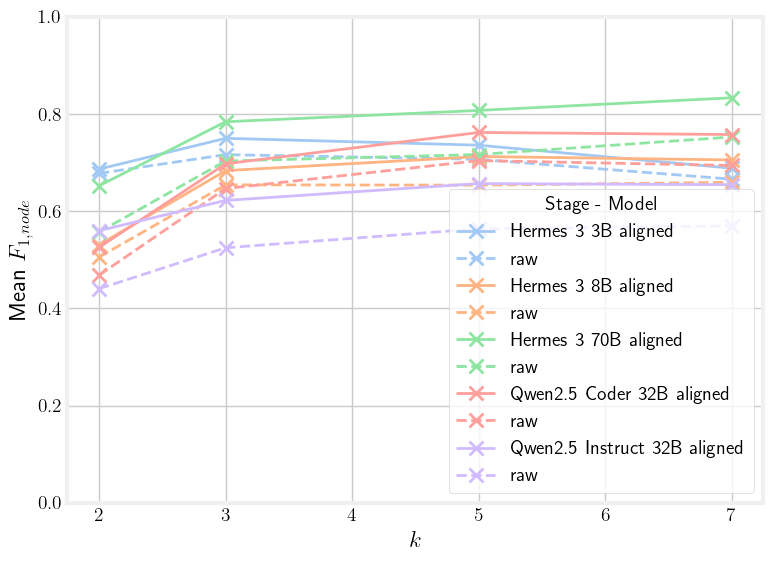

Plotting DBpedia - f1_score_rel - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting DBpedia - f1_score_rel - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting DBpedia - f1_score_rel - aligned - Hermes 3 8B
x solid #ffb482
Plotting DBpedia - f1_score_rel - raw - Hermes 3 8B
x dashed #ffb482
Plotting DBpedia - f1_score_rel - aligned - Hermes 3 70B
x solid #8de5a1
Plotting DBpedia - f1_score_rel - raw - Hermes 3 70B
x dashed #8de5a1
Plotting DBpedia - f1_score_rel - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting DBpedia - f1_score_rel - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting DBpedia - f1_score_rel - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting DBpedia - f1_score_rel - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


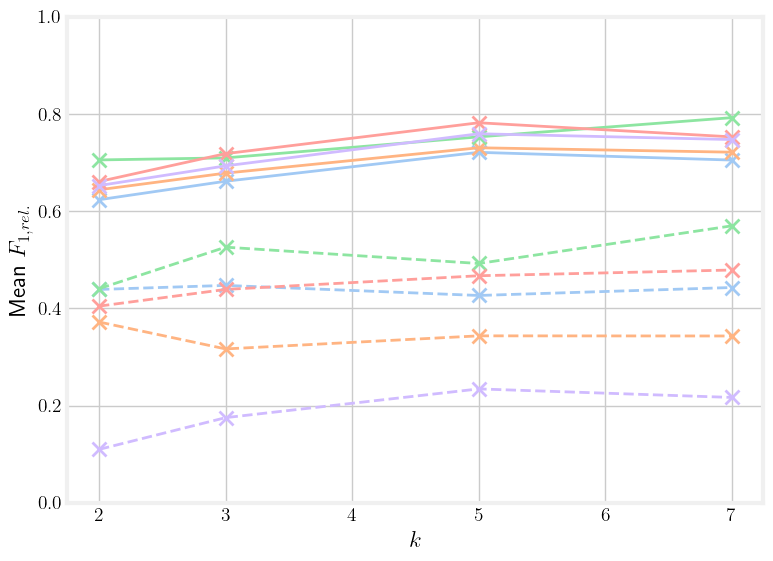

Plotting DBpedia - normed_ged - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting DBpedia - normed_ged - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting DBpedia - normed_ged - aligned - Hermes 3 8B
x solid #ffb482
Plotting DBpedia - normed_ged - raw - Hermes 3 8B
x dashed #ffb482
Plotting DBpedia - normed_ged - aligned - Hermes 3 70B
x solid #8de5a1
Plotting DBpedia - normed_ged - raw - Hermes 3 70B
x dashed #8de5a1
Plotting DBpedia - normed_ged - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting DBpedia - normed_ged - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting DBpedia - normed_ged - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting DBpedia - normed_ged - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


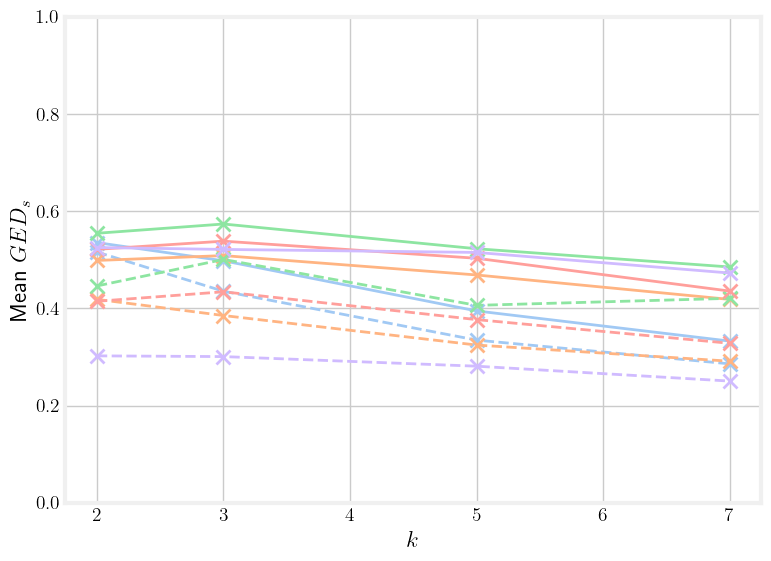

Plotting UniProt - f1_score - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting UniProt - f1_score - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting UniProt - f1_score - aligned - Hermes 3 8B
x solid #ffb482
Plotting UniProt - f1_score - raw - Hermes 3 8B
x dashed #ffb482
Plotting UniProt - f1_score - aligned - Hermes 3 70B
x solid #8de5a1
Plotting UniProt - f1_score - raw - Hermes 3 70B
x dashed #8de5a1
Plotting UniProt - f1_score - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting UniProt - f1_score - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting UniProt - f1_score - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting UniProt - f1_score - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


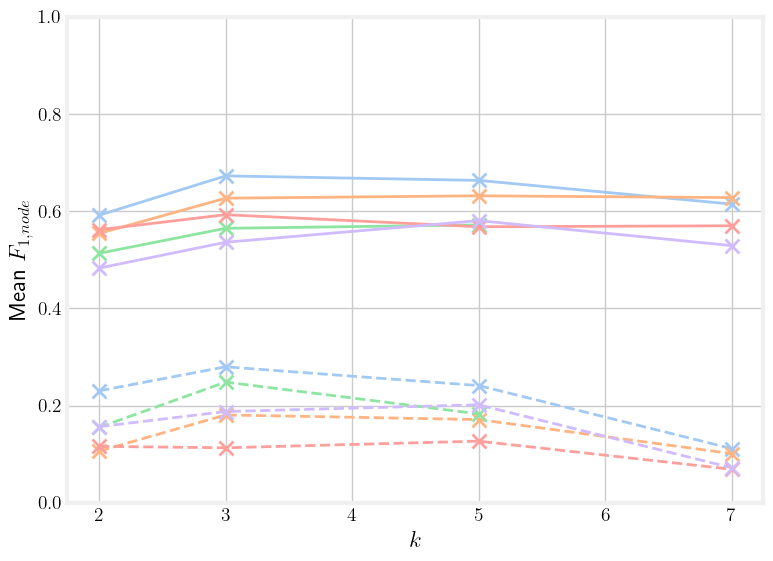

Plotting UniProt - f1_score_rel - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting UniProt - f1_score_rel - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting UniProt - f1_score_rel - aligned - Hermes 3 8B
x solid #ffb482
Plotting UniProt - f1_score_rel - raw - Hermes 3 8B
x dashed #ffb482
Plotting UniProt - f1_score_rel - aligned - Hermes 3 70B
x solid #8de5a1
Plotting UniProt - f1_score_rel - raw - Hermes 3 70B
x dashed #8de5a1
Plotting UniProt - f1_score_rel - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting UniProt - f1_score_rel - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting UniProt - f1_score_rel - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting UniProt - f1_score_rel - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


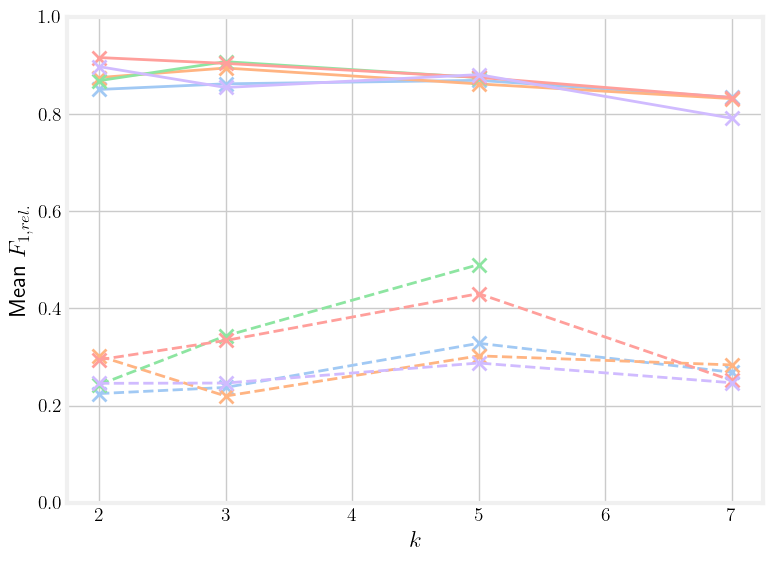

Plotting UniProt - normed_ged - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting UniProt - normed_ged - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting UniProt - normed_ged - aligned - Hermes 3 8B
x solid #ffb482
Plotting UniProt - normed_ged - raw - Hermes 3 8B
x dashed #ffb482
Plotting UniProt - normed_ged - aligned - Hermes 3 70B
x solid #8de5a1
Plotting UniProt - normed_ged - raw - Hermes 3 70B
x dashed #8de5a1
Plotting UniProt - normed_ged - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting UniProt - normed_ged - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting UniProt - normed_ged - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting UniProt - normed_ged - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


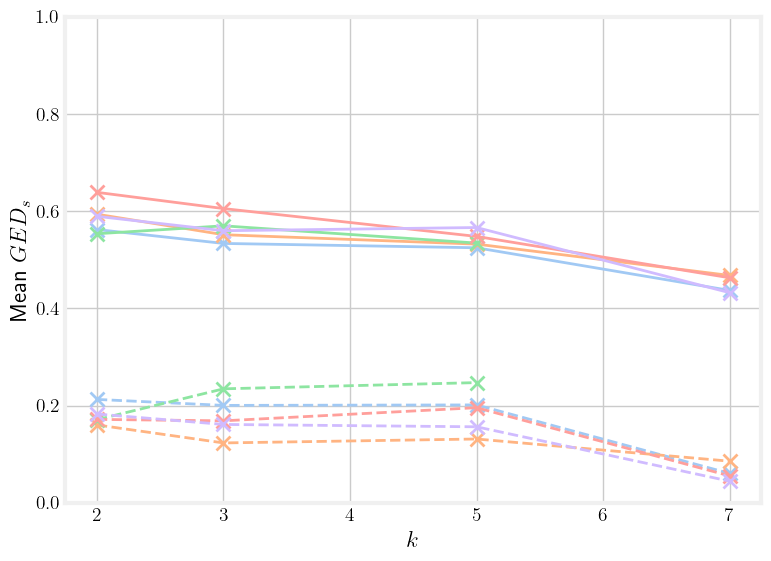

Plotting BTO - f1_score - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting BTO - f1_score - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting BTO - f1_score - aligned - Hermes 3 8B
x solid #ffb482
Plotting BTO - f1_score - raw - Hermes 3 8B
x dashed #ffb482
Plotting BTO - f1_score - aligned - Hermes 3 70B
x solid #8de5a1
Plotting BTO - f1_score - raw - Hermes 3 70B
x dashed #8de5a1
Plotting BTO - f1_score - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting BTO - f1_score - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting BTO - f1_score - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting BTO - f1_score - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


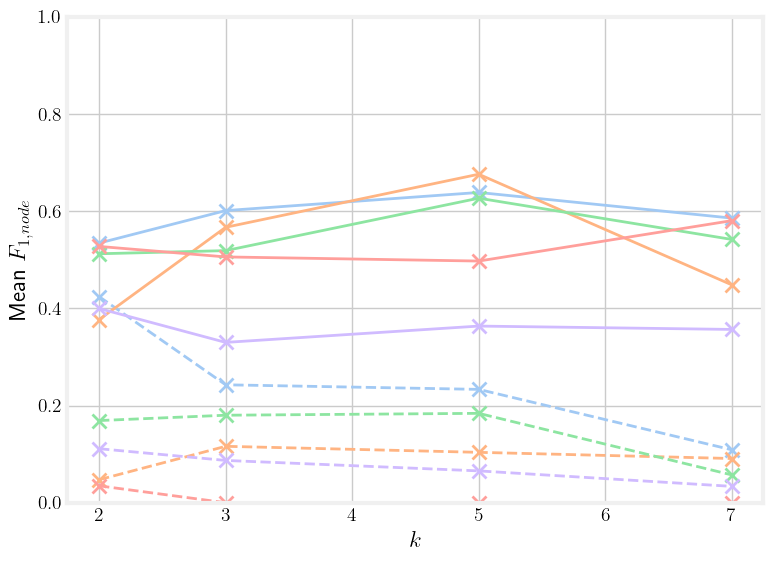

Plotting BTO - f1_score_rel - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting BTO - f1_score_rel - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting BTO - f1_score_rel - aligned - Hermes 3 8B
x solid #ffb482
Plotting BTO - f1_score_rel - raw - Hermes 3 8B
x dashed #ffb482
Plotting BTO - f1_score_rel - aligned - Hermes 3 70B
x solid #8de5a1
Plotting BTO - f1_score_rel - raw - Hermes 3 70B
x dashed #8de5a1
Plotting BTO - f1_score_rel - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting BTO - f1_score_rel - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting BTO - f1_score_rel - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting BTO - f1_score_rel - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


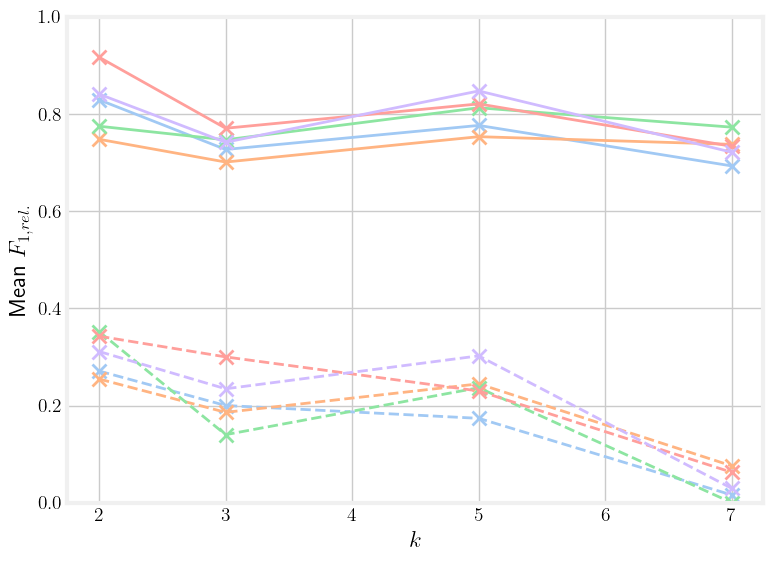

Plotting BTO - normed_ged - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting BTO - normed_ged - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting BTO - normed_ged - aligned - Hermes 3 8B
x solid #ffb482
Plotting BTO - normed_ged - raw - Hermes 3 8B
x dashed #ffb482
Plotting BTO - normed_ged - aligned - Hermes 3 70B
x solid #8de5a1
Plotting BTO - normed_ged - raw - Hermes 3 70B
x dashed #8de5a1
Plotting BTO - normed_ged - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting BTO - normed_ged - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting BTO - normed_ged - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting BTO - normed_ged - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


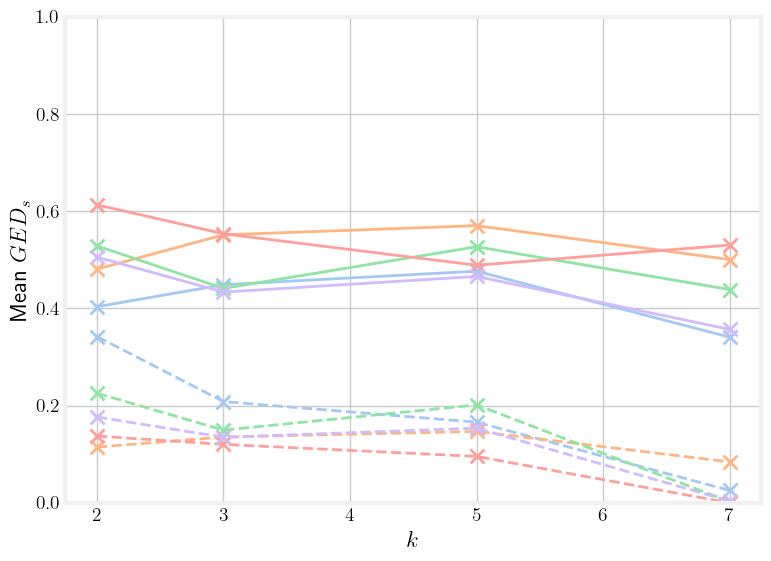

Plotting Yago - f1_score - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting Yago - f1_score - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting Yago - f1_score - aligned - Hermes 3 8B
x solid #ffb482
Plotting Yago - f1_score - raw - Hermes 3 8B
x dashed #ffb482
Plotting Yago - f1_score - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting Yago - f1_score - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting Yago - f1_score - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting Yago - f1_score - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


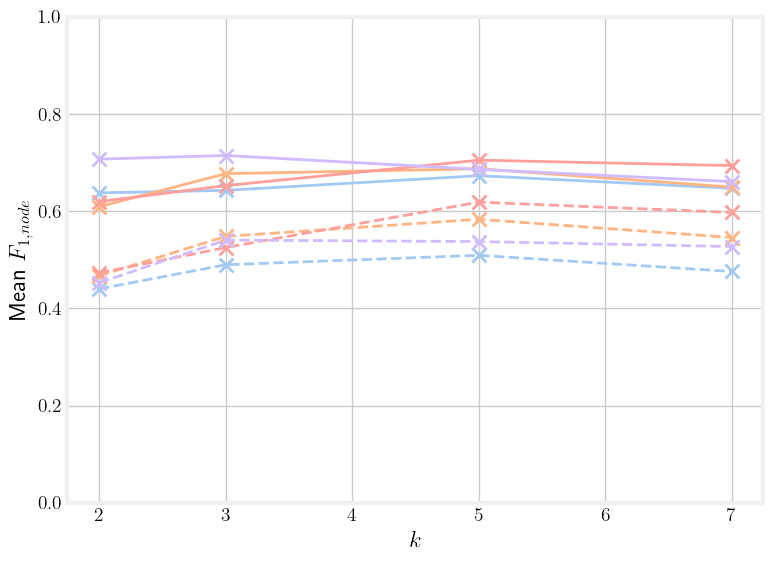

Plotting Yago - f1_score_rel - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting Yago - f1_score_rel - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting Yago - f1_score_rel - aligned - Hermes 3 8B
x solid #ffb482
Plotting Yago - f1_score_rel - raw - Hermes 3 8B
x dashed #ffb482
Plotting Yago - f1_score_rel - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting Yago - f1_score_rel - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting Yago - f1_score_rel - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting Yago - f1_score_rel - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


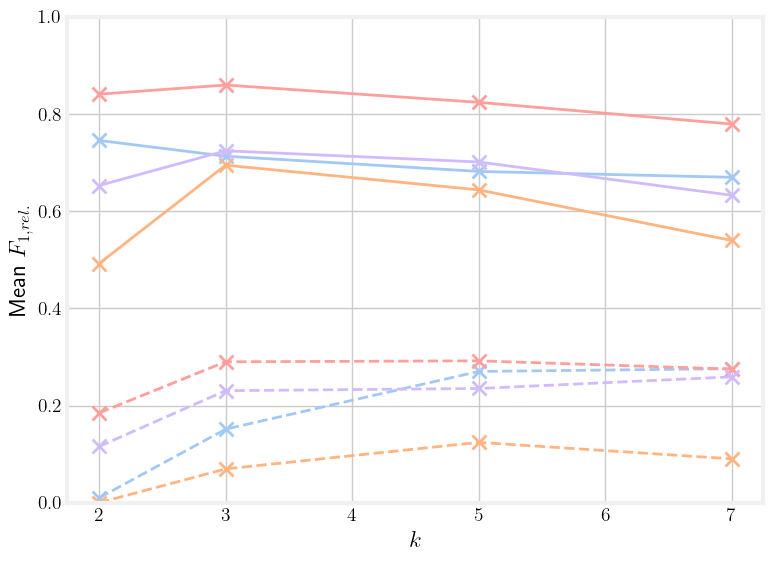

Plotting Yago - normed_ged - aligned - Hermes 3 3B
x solid #a1c9f4
Plotting Yago - normed_ged - raw - Hermes 3 3B
x dashed #a1c9f4
Plotting Yago - normed_ged - aligned - Hermes 3 8B
x solid #ffb482
Plotting Yago - normed_ged - raw - Hermes 3 8B
x dashed #ffb482
Plotting Yago - normed_ged - aligned - Qwen2.5 Coder 32B
x solid #ff9f9b
Plotting Yago - normed_ged - raw - Qwen2.5 Coder 32B
x dashed #ff9f9b
Plotting Yago - normed_ged - aligned - Qwen2.5 Instruct 32B
x solid #d0bbff
Plotting Yago - normed_ged - raw - Qwen2.5 Instruct 32B
x dashed #d0bbff


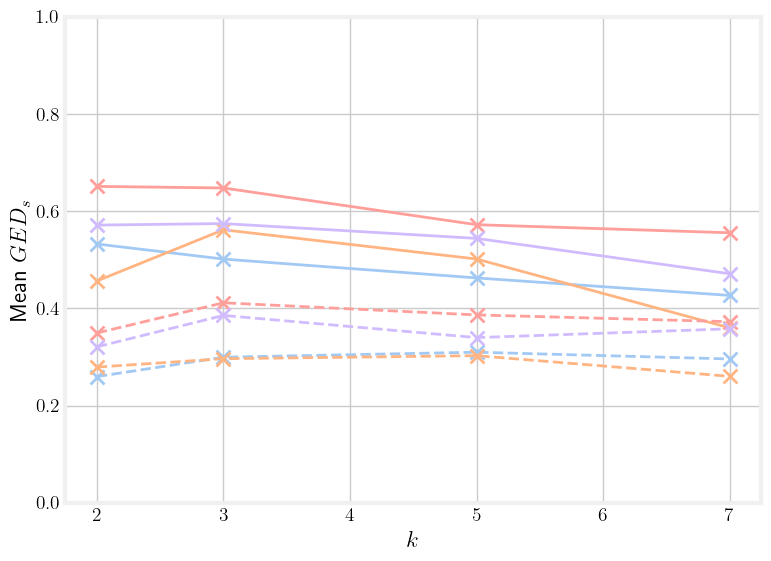

In [37]:
for dataset in grouped_dfs_raw.keys():
    df = grouped_dfs_raw[dataset].reset_index()
    df = df[(df["prompt_type"] == "one shot") & (df["n_nodes"] < 8)]
    metrics = [
        "f1_score",
        "f1_score_rel",
        "normed_ged",
    ]
    for metric in metrics:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        # fig.suptitle(f"{column_map[metric]} for {dataset}")
        patterns_stage = {
            "aligned": "solid",
            "raw": "dashed",
        }
        markers_stage = {
            "aligned": "x",
            "raw": "x",
            }
        for i, model in enumerate(chosen_models):
            for stage in df["stage"].unique():
                data = df[(df["stage"] == stage) & (df["model"] == model)]
                lower, median, upper, mean = tuple(
                    [
                        data[data["percentile"] == q][metric].to_numpy()
                        for q in quantiles + ["mean"]
                    ]
                )
                k = data[data["percentile"] == quantiles[1]]["n_nodes"].to_numpy()
                if not data.empty:
                    # ax.errorbar(
                    #     k,
                    #     median,
                    #     yerr=np.abs(np.stack([lower, upper]) - median),
                    #     label=f"{stage} - {model}",
                    #     marker=markers_stage[stage],
                    #     fillstyle="none",
                    #     markeredgecolor=palette[i],
                    #     # markeredgewidth=10,
                    #     # barsabove=
                    #     capsize=5,
                    #     linestyle=patterns_stage[stage],
                    #     color=palette[i],
                    #     ecolor=adjust_lightness(palette[i]),
                    # )
                    ax.plot(
                        k,
                        mean,
                        label=f"{model} {stage}" if stage == "aligned" else f"{stage}",
                        marker=markers_stage[stage],
                        fillstyle="none",
                        markeredgecolor=palette[i],
                        markersize=10,
                        markeredgewidth=2,
                        linewidth=2,
                        linestyle=patterns_stage[stage],
                        color=palette[i],
                    )
                    print(f"Plotting {dataset} - {metric} - {stage} - {model}")
                    print(markers_stage[stage], patterns_stage[stage], palette[i])

        # ax.set_title(f"Comparison of {dataset} across stages and prompt types")
        ax.set_xlabel("$k$")
        ax.set_ylabel(f"Mean {column_map[metric]}")
        if metric == "f1_score" and dataset == "DBpedia":
            legend=ax.legend(title="Stage - Model")
            legend.set_ncols(2)
        
        ax.set_ylim(0, 1)
        tikzplotlib.save(
            f"figures/compare_{dataset}_{metric}.tex",
            extra_tikzpicture_parameters=[
                "scale=0.5",
                """every axis/.style={
                    legend pos=south west, 
                    legend style={
                font=\\small},
                    legend columns=2, 
                }""",
            ],
            axis_height="1.5\\textwidth",
            axis_width="2\\textwidth",
        )
        plt.show()

In [31]:
np.stack([lower, upper]).shape

(2, 4)

In [32]:
upper-lower

array([0.33333333, 0.4       , 0.44444444, 0.42728938])

In [33]:
(upper - lower) / 2

array([0.16666667, 0.2       , 0.22222222, 0.21364469])